In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from growth.sweep.sweep import Sweep
%matplotlib inline

In [2]:
ls ../../../data/synthetic/sweeps/Sweep_181201_191516/

batches/     data.hdf     log/         scripts/
benchmark/   job.pkl      notes.txt    simulations/


In [3]:
sweep_path = '../../../data/synthetic/sweeps/Sweep_181201_191516/'
sweep = Sweep.load(sweep_path)
sweep

1 x 16 sweep, 4 recombination generations

In [4]:
simulation = sweep[5]

In [5]:
image = simulation.generate_microscopy(ambiguity=0.3, rho=0.5, bleedthrough=0.5)

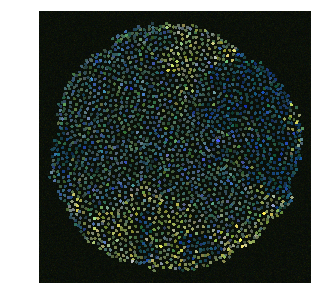

In [6]:
_ = image.render()

In [7]:
clonal_marker = image.measure(1)
control = image.measure(2)

In [5]:
from clones.validation import SimulationBenchmark

In [7]:
data = simulation.measure(.5)

In [8]:
training_kw = dict(max_num_components=3, sampler_kwargs=dict(depth=0.5))
benchmark = SimulationBenchmark(data, attribute='clonal_marker', training_kw=training_kw)

In [9]:
benchmark.MAE

0.10515829207399557

In [12]:
benchmark.MAE_comm

0.15280013413198593

In [10]:
benchmark.MAE_levels

0.23463777426362778

In [11]:
benchmark.MAE_spatial

0.10392163543775908

In [239]:
from clones.validation import BatchBenchmark

In [15]:
graph = benchmark.build_graph(benchmark.data, weighted_by='clonal_marker')

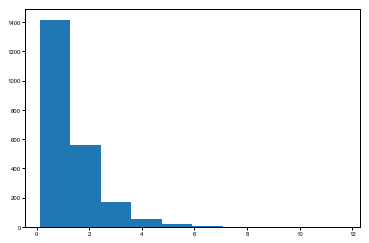

In [18]:
_ = plt.hist(graph.data.clonal_marker.values)

In [23]:
ls 

Sweep_181201_191516/ Sweep_181201_191521/ growth_conditions/


In [24]:
sweep = Sweep.load('../../../data/synthetic/sweeps/Sweep_181201_191516/')

In [27]:
sweep.batches

array([[<growth.sweep.batch.Batch object at 0x103ca3198>,
        <growth.sweep.batch.Batch object at 0x103c9be10>]], dtype=object)